#Iris Flower Classification

##Import necessary modules

Firstly, we should import all necessary modules for loading dataset, visualizing and for model to classify iris species

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to split dataset into train and test
#import several model for classification to ge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#to calculate accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
# another way of load iris dataset >>> from sklearn.dataset import load_iris 
import warnings
warnings.simplefilter('ignore') #to ignore warnings 
%matplotlib inline

##Load dataset

In [83]:
iris = pd.read_csv("/content/Iris.csv") #iris=load_iris()
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


to rename columns :)



In [84]:
iris.columns = ['id','sepal_length','sepal_width','petal_length','petal_width','species']
iris.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


remove unnecessary columns:)

In [85]:
iris = iris.drop(['id'],axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##Explore Dataset

In [86]:
print("Description of iris dataset:> \n\n {}".format(iris.describe()))

Description of iris dataset:> 

        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [87]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [88]:
iris.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [89]:
print("Type of the columns of dataset:> \n\n{}".format(iris.dtypes))

Type of the columns of dataset:> 

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [90]:
print("Shape of dataset : {}".format(iris.shape))

Shape of dataset : (150, 5)


In [91]:
print('Column name : \n{}'.format(iris.columns))

Column name : 
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [92]:
#null vaues
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

this shows that dataset have no null values

##Visualize Data

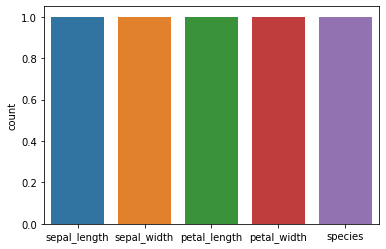

In [93]:
sns.countplot(iris.columns)

Text(0.5, 0.98, 'Pairplot of Iris Dataset')

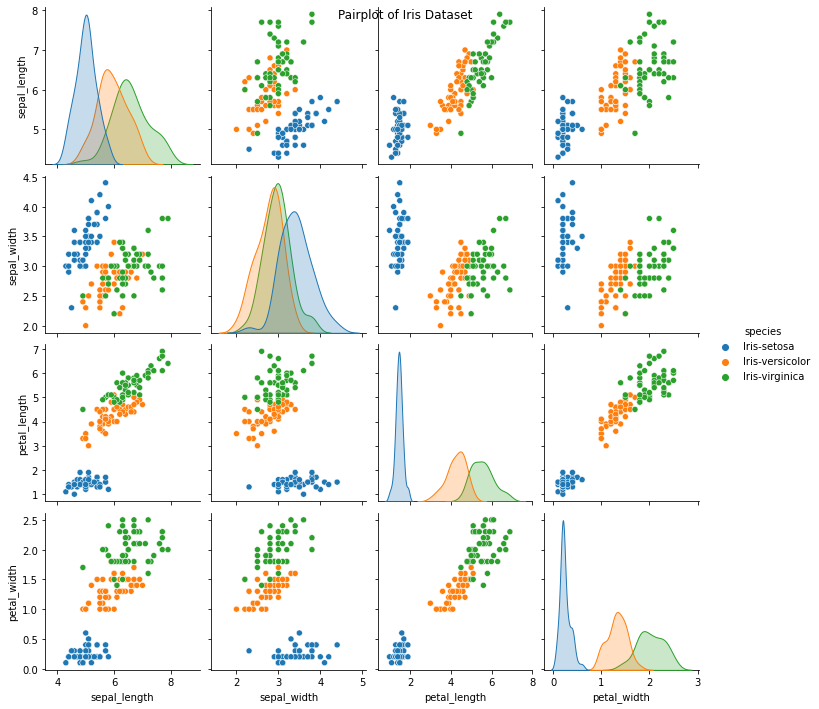

In [94]:
sns.pairplot(iris,hue='species').fig.suptitle('Pairplot of Iris Dataset')

##Define X and y

where X contain all independent variables and y contains dependent variables

In [95]:
X = iris.drop('species',axis=1)
y = iris['species']

In [96]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [97]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [98]:
print("Shape of X (Independent Features):\n {}".format(X.shape))
print("Shape of y (Dependent Features):\n {}".format(y.shape))

Shape of X (Independent Features):
 (150, 4)
Shape of y (Dependent Features):
 (150,)


##Split data into train and test dataset

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of X_test: {}'.format(X_test.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of y: {}'.format(y_test.shape))

Shape of X_train: (112, 4)
Shape of X_test: (38, 4)
Shape of y_train: (112,)
Shape of y: (38,)


##Model Selection and Evalua

###KNeighborsClassifier

In [100]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_y_pred = knn.predict(X_test)
knn_y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [101]:
print('Accuracy of KNeighborsClassifier model : {:.2f}'.format(accuracy_score(y_test,knn_y_pred)*100))

Accuracy of KNeighborsClassifier model : 94.74


In [81]:
print("Confusion Matrix :\n {}".format(confusion_matrix(y_test,knn_y_pred)))

Confusion Matrix :
 [[12  0  0]
 [ 0 12  1]
 [ 0  0 13]]


###Logistic Regression 

In [102]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_y_pred = logreg.predict(X_test)
logreg_y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [103]:
print('Accuracy of Logistic Regression model : {:.2f}'.format(accuracy_score(y_test,logreg_y_pred)*100))

Accuracy of Logistic Regression model : 92.11


In [104]:
print("Confusion Matrix :\n {}".format(confusion_matrix(y_test,logreg_y_pred)))

Confusion Matrix :
 [[11  0  0]
 [ 0 11  2]
 [ 0  1 13]]


###Support Vector Classifier (SVC)

In [105]:
svc = SVC()
svc.fit(X_train,y_train)
svc_y_pred = svc.predict(X_test)
svc_y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [106]:
print('Accuracy of SVC model : {:.2f}'.format(accuracy_score(y_test,svc_y_pred)*100))

Accuracy of SVC model : 86.84


In [107]:
print("Confusion Matrix :\n {}".format(confusion_matrix(y_test,svc_y_pred)))

Confusion Matrix :
 [[11  0  0]
 [ 0 11  2]
 [ 0  3 11]]


###Decision Tree Classifier

In [108]:
dct = DecisionTreeClassifier(max_depth=2)
dct.fit(X_train,y_train)
dct_y_pred = dct.predict(X_test)
dct_y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [109]:
print('Accuracy of Decision Tree Classifier model : {:.2f}'.format(accuracy_score(y_test,dct_y_pred)*100))

Accuracy of Decision Tree Classifier model : 86.84


In [110]:
print("Confusion Matrix :\n {}".format(confusion_matrix(y_test,svc_y_pred)))

Confusion Matrix :
 [[11  0  0]
 [ 0 11  2]
 [ 0  3 11]]


##Summarization 

In [126]:
accuracy = {"KNeighborsClassifier":[accuracy_score(y_test,knn_y_pred)*100],"Logistic Regression":[accuracy_score(y_test,logreg_y_pred)*100],
            "SVC":[accuracy_score(y_test,svc_y_pred)*100],"Decision Tree Classfier":[accuracy_score(y_test,dct_y_pred)*100]}
accuracy_df = pd.DataFrame.from_dict(accuracy,orient='index',columns=['Score'])
accuracy_df

,Score
KNeighborsClassifier,94.736842
Logistic Regression,92.105263
SVC,86.842105
Decision Tree Classfier,86.842105
